In [1]:
! pip install -q gwpy=="1.0.1"

     |████████████████████████████████| 1.4MB 4.6MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 61kB 6.4MB/s 
     |████████████████████████████████| 2.6MB 17.3MB/s 


In [2]:
import gwpy

In [3]:
from gwosc.datasets import event_gps

In [5]:
gps2=event_gps('GW170817')

In [6]:
print(gps2)

1187008882.4


In [ ]:

segment=(int(gps2)-5,int(gps2)+5)

In [ ]:
print(segment)


(1126259457, 1126259467)


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [ ]:
from gwpy.timeseries import TimeSeries
hdata=TimeSeries.fetch_open_data('H1',*segment,verbose=True,cache=True)
ldata=TimeSeries.fetch_open_data('L1',*segment,verbose=True,cache=True)
#vdata=TimeSeries.fetch_open_data('V1',*segment,verbose=True,cache=True)
sig=hdata
sinwave=np.sin(gps2)
sigcomb1=hdata+sinwave
print(sig)
print(sigcomb1)

Fetched 1 URLs from www.gw-openscience.org for [1126259457 .. 1126259467))
Reading data... [Done]
Fetched 1 URLs from www.gw-openscience.org for [1126259457 .. 1126259467))
Reading data... [Done]
TimeSeries([-3.37408113e-19, -3.60538427e-19, -3.22327735e-19,
            ...,  1.52206625e-19,  1.58897479e-19,
             1.71197631e-19]
           unit: dimensionless,
           t0: 1126259457.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)
TimeSeries([-0.79008049, -0.79008049, -0.79008049, ...,
            -0.79008049, -0.79008049, -0.79008049]
           unit: dimensionless,
           t0: 1126259457.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


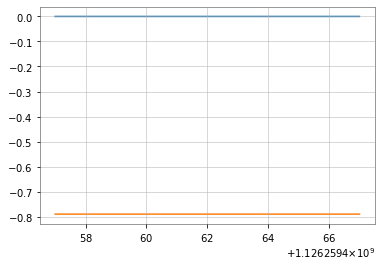

In [ ]:
%matplotlib inline
plt.plot(sigcomb1)

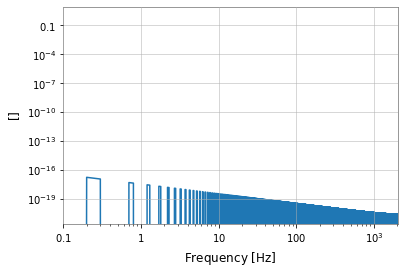

In [ ]:
fft=sig.fft()
fft1=sigcomb1.fft()
plot2 = fft.abs().plot(xscale="log", yscale="log")
plot3=fft1.abs().plot(xscale="log", yscale="log")
plot2.show()

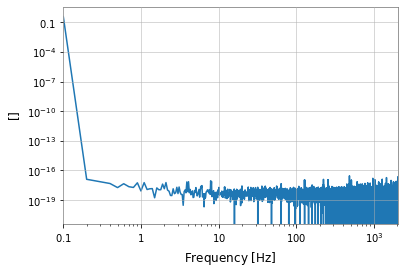

In [ ]:
from scipy.signal import get_window
window = get_window('hann', sigcomb1.size)
win = sigcomb1 * window
fftamp = win.fft().abs()
plot = fftamp.plot(xscale="log", yscale="log")
plot.show()

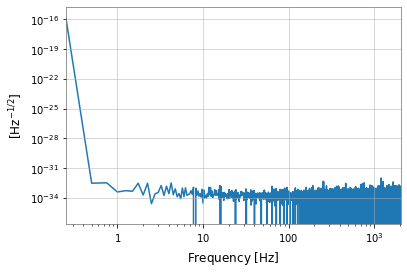

In [ ]:
asd = sigcomb1.asd(fftlength=4, method="median")
plot4 = asd.plot()
plot4.show()

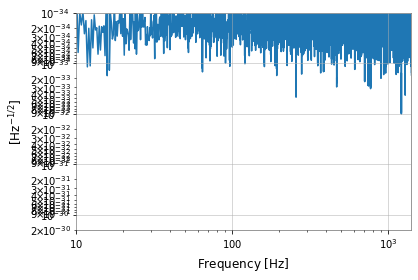

In [ ]:
ax = plot4.gca()
ax.set_xlim(10, 1400)
ax.set_ylim(2e-30, 1e-34)
plot4

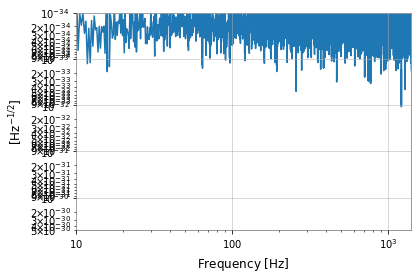

In [ ]:
hdata2 = TimeSeries.fetch_open_data('H1', int(gps2)-15, int(gps2)+15, cache=True)
ldata2= TimeSeries.fetch_open_data('L1', int(gps2)-15, int(gps2)+15, cache=True)
#vdata2=TimeSeries.fetch_open_data('V1', int(gps2)-15, int(gps2)+15, cache=True)
sig2=hdata2+sinwave
hlvasd2 = sig2.asd(fftlength=4, method="median")
plot = hlvasd2.plot()
ax = plot.gca()
ax.set_xlim(10, 1400)
ax.set_ylim(5e-30, 1e-34)
plot.show()

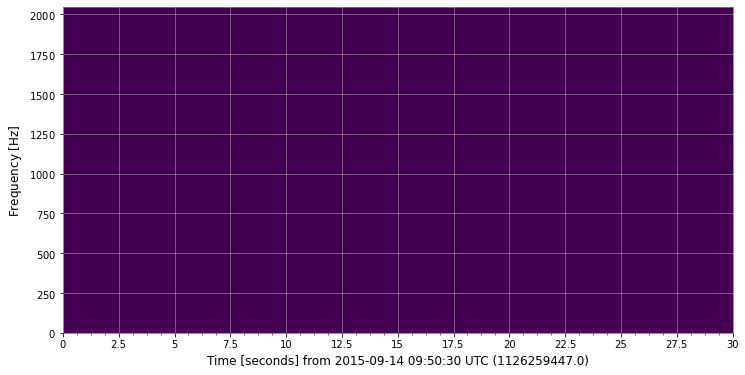

In [ ]:
specgram = sig2.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plot = specgram.plot()

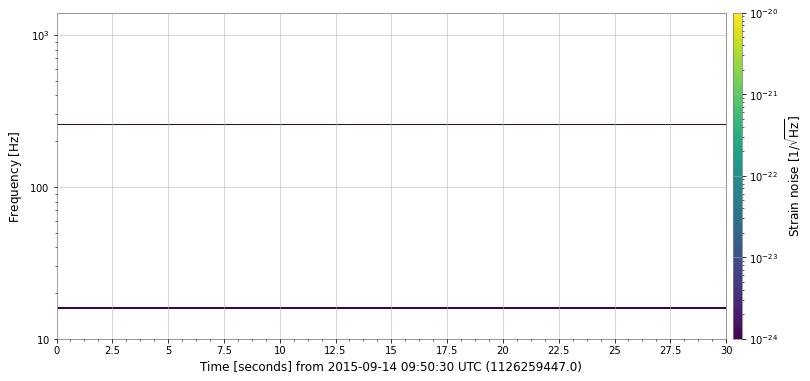

In [ ]:
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10, 1400)
ax.colorbar(
    clim=(1e-24, 1e-20),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)
plot  # refresh

In [ ]:
seg2 = (int(gps2) - 30, int(gps2) + 2)
hdata3 = TimeSeries.fetch_open_data('H1', *seg2, verbose=True, cache=True)
ldata3 = TimeSeries.fetch_open_data('L1', *seg2, verbose=True, cache=True)
vdata3 = TimeSeries.fetch_open_data('V1', *seg2, verbose=True, cache=True)
signalfin=hdata3+ldata3+vdata3

Fetched 1 URLs from www.gw-openscience.org for [1187008852 .. 1187008884))
Reading data... [Done]
Fetched 1 URLs from www.gw-openscience.org for [1187008852 .. 1187008884))
Reading data... [Done]
Fetched 1 URLs from www.gw-openscience.org for [1187008852 .. 1187008884))
Reading data... [Done]


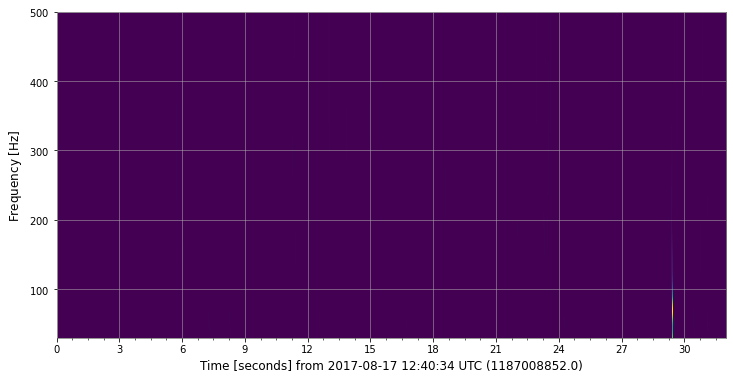

In [ ]:
hq = signalfin.q_transform(frange=(30, 500))
plotfin = hq.plot()
plot.colorbar(label="Normalised energy")

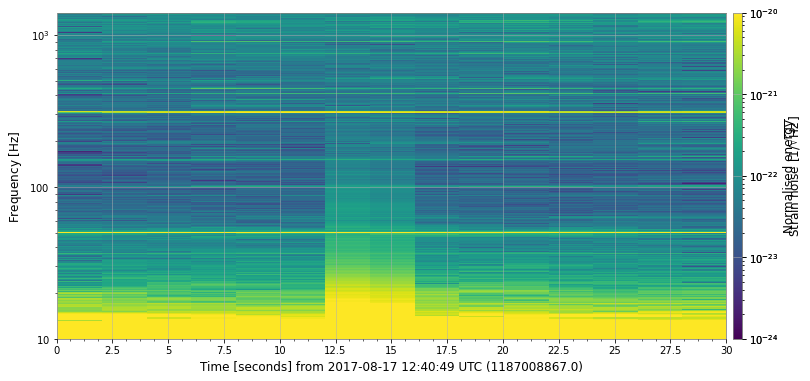

In [ ]:
ax = plotfin.gca()
ax.set_epoch(gps2)
ax.set_ylim(20, 500)
ax.set_yscale("log")
plot  # refresh

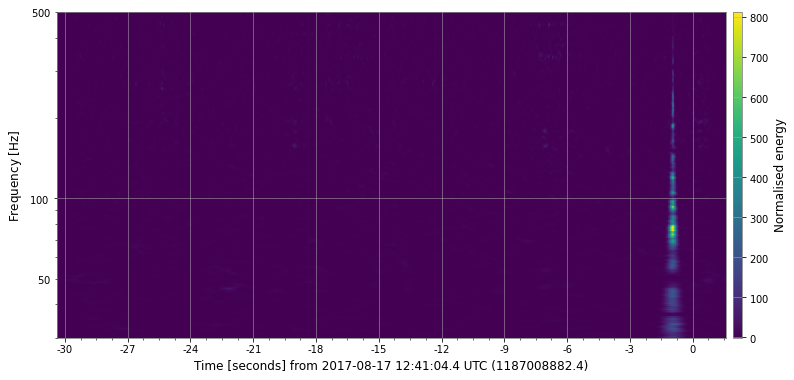

In [ ]:
hq = signalfin.q_transform(frange=(30, 500), qrange=(100, 110))
plot = hq.plot()
ax = plot.gca()
ax.set_epoch(gps2)
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

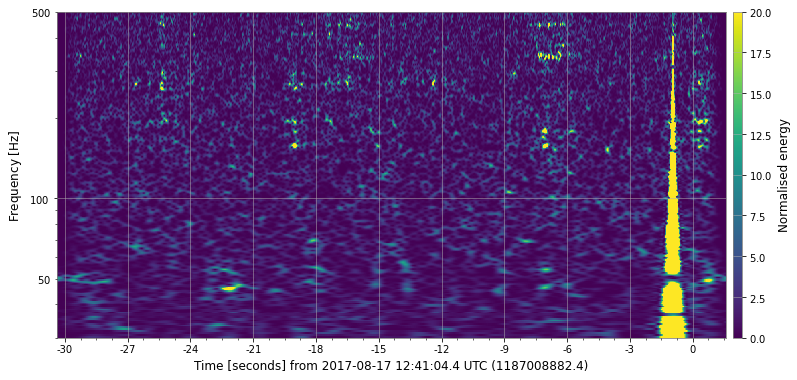

In [ ]:
plot.colorbars[0].mappable.set_clim(0,10)
plot.refresh()
plot